# NetworkX - Fundamentals

_The contents of this notebook have been derived from "A First Course in Network Science" by Filippo Menczer. [You can see their official Github repository here.](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master)_

You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This tutorial takes you through a few basic examples and exercises.

Note that many exercises are followed by a block with some `assert` statements. These assertions may be preceded by some setup code. They are provided to give you feedback that you are on the right path -- receiving an `AssertionError` probably means you've done something wrong.

**Contents:**

1. [Creating and drawing undirected graphs](#1.-Creating-and-drawing-undirected-graphs)
2. [Graph methods](#2.-Graph-methods)
3. [Node names](#3.-Node-names)
4. [Adjacency lists](#4.-Adjacency-lists)
5. [Directed graphs](#5.-Directed-graphs)


In [20]:
import matplotlib.pyplot as plt
import networkx as nx

## 1. Creating and drawing undirected graphs


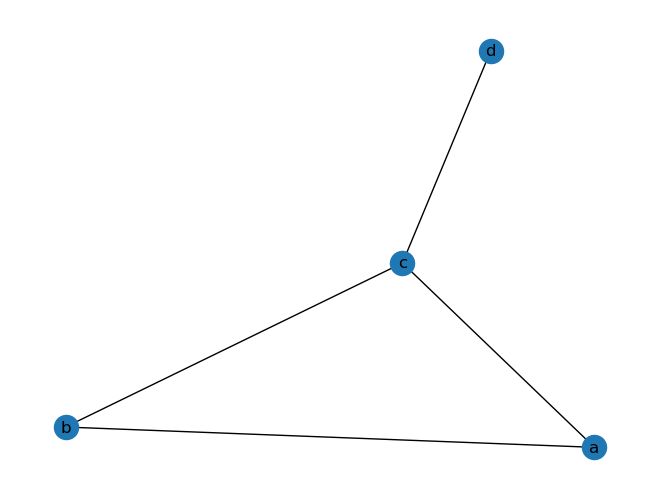

In [21]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node("a")

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ["b", "c", "d"]
G.add_nodes_from(nodes_to_add)

# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge("a", "b")

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [("a", "c"), ("b", "c"), ("c", "d")]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)
plt.show()

There are many optional arguments to the draw function to customize the appearance.


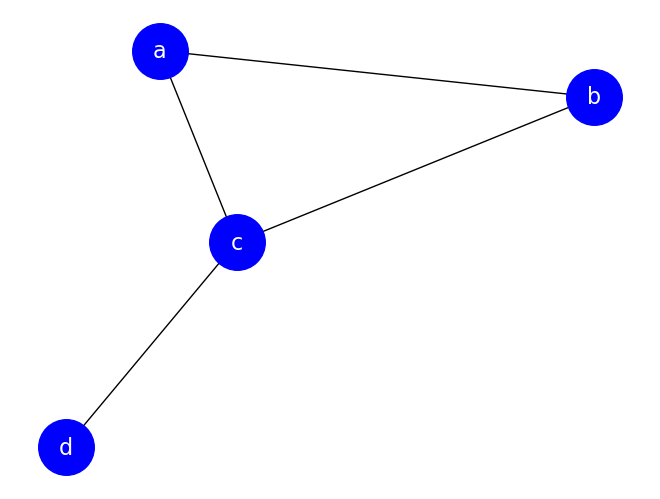

In [22]:
nx.draw(
    G,
    with_labels=True,
    node_color="blue",
    node_size=1600,
    font_color="white",
    font_size=16,
)
plt.show()

### A note on naming conventions

Usually in Python, variables are named in `snake_case`, i.e. lowercase with underscores separating words. Classes are conventionally named in `CamelCase`, i.e. with the first letter of each word capitalized.

Obviously NetworkX doesn't use this convention, often using single capital letters for the names of graphs. This is an example of convention leaking from the world of discrete mathematics. Since most of the documentation you will find online uses this convention, we will follow it as well.


---


## 2. Graph methods

The graph object has some properties and methods giving data about the whole graph.


In [23]:
# List all of the nodes
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [24]:
# List all of the edges
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

Note that the edges are given as 2-tuples, the same way we entered them.

We can get the number of nodes and edges in a graph using the `number_of_` methods.


In [25]:
G.number_of_nodes()

4

In [26]:
G.number_of_edges()

4

Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:


In [27]:
# list of neighbors of node 'b'
list(G.neighbors("b"))  # neighbors() returns an iterator

['a', 'c']

### NetworkX functions vs. Graph methods

The previous data are available via graph _methods_, _i.e._ they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:


In [28]:
nx.is_tree(G)

False

In [29]:
nx.is_connected(G)

True

### Node and edge existence

To check if a node is present in a graph, you can use the `has_node()` method:


In [30]:
G.has_node("a")

True

In [31]:
G.has_node("x")

False

Likewise we can check if two nodes are connected by an edge:


In [32]:
G.has_edge("a", "b")

True

In [33]:
G.has_edge("a", "d")

False

### Node degree

One of the most important questions we can ask about a node in a graph is how many other nodes it connects to.


In [34]:
G.degree("a")

2

### EXERCISE 1

Often in the context of trees, a node with degree 1 is called a _leaf_. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.


In [35]:
def get_leaves(G: nx.Graph):


SyntaxError: incomplete input (2301721220.py, line 1)

In [ ]:
G = nx.Graph()
G.add_edges_from(
    [
        ("a", "b"),
        ("a", "d"),
        ("c", "d"),
    ]
)
assert set(get_leaves(G)) == {"c", "b"}

NameError: name 'get_leaves' is not defined

---


## 3. Node names

The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.


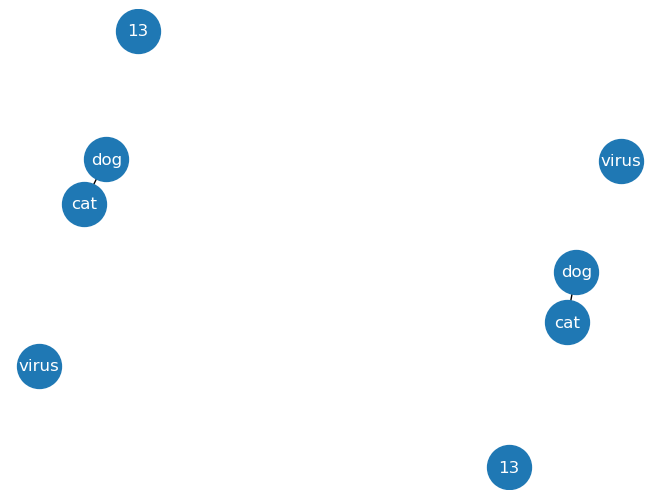

In [ ]:
G = nx.Graph()

G.add_nodes_from(["cat", "dog", "virus", 13])

G.add_edge("cat", "dog")

nx.draw(G, with_labels=True, font_color="white", node_size=1000)
plt.show()

---


## 4. Adjacency lists


One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:

```
a d e
b c
c
d
e
```

the edges are as follows:

```
(a, d)
(a, e)
(b, c)
```

The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

In the `data` directory, there is a file called `friends.adjlist`. NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph SG, for social graph.


In [ ]:
SG = nx.read_adjlist("../../data/friends.adjlist")

We know how to draw this graph:


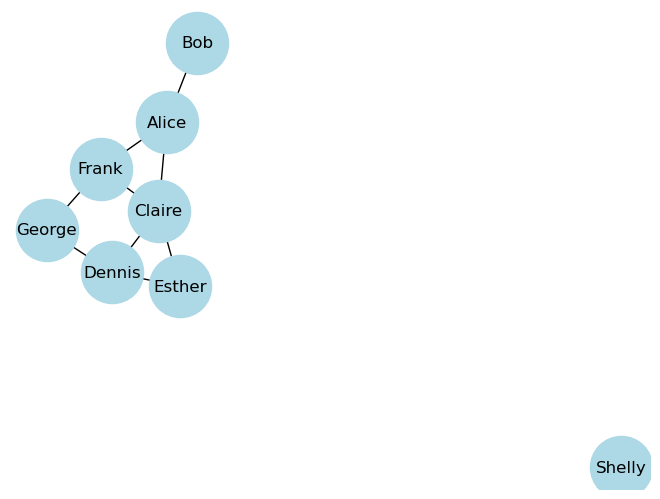

In [ ]:
nx.draw(SG, node_size=2000, node_color="lightblue", with_labels=True)
plt.show()

And we know how to get information such as the number of friends linked from a node:


In [ ]:
SG.degree("Alice")

3

### EXERCISE 2

Write a function max_degree that takes a graph as its argument, and returns a 2-tuple with the name and degree of the node with highest degree.


In [ ]:
def max_degree(G):
    

In [ ]:
SG = nx.read_adjlist("../../data/friends.adjlist")
assert max_degree(SG) == ("Claire", 4)

### EXERCISE 3

Write a function `mutual_friends` that takes a graph and two nodes as arguments, and returns a list (or set) of nodes that are linked to both given nodes. For example, in the graph `SG` drawn above,

    mutual_friends(SG, 'Alice', 'Claire') == ['Frank']

an empty list or set should be returned in the case where two nodes have no mutual friends, e.g. George and Bob in `SG` drawn above.


In [ ]:
def mutual_friends(G, node_1, node_2):

In [ ]:
SG = nx.read_adjlist("../../data/friends.adjlist")
assert mutual_friends(SG, "Alice", "Claire") == ["Frank"]
assert mutual_friends(SG, "George", "Bob") == []
assert sorted(mutual_friends(SG, "Claire", "George")) == ["Dennis", "Frank"]

---


## 5. Directed graphs

Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.


In [ ]:
D = nx.DiGraph()

D.add_edges_from(
    [(1, 2), (2, 3), (3, 2), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (6, 4), (4, 2)]
)

nx.draw(D, with_labels=True)
plt.show()

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:


In [ ]:
D.has_edge(1, 2)

True

In [ ]:
D.has_edge(2, 1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):


In [ ]:
print("Successors of 2:", list(D.successors(2)))

print("Predecessors of 2:", list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:


In [ ]:
D.in_degree(2)

3

In [ ]:
D.out_degree(2)

1

### Caveat

Since NetworkX 2, the `.degree()` method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the `neighbors` method is a synonym for `successors`, giving only the edges originating from the given node. This makes sense if you consider `neighbors` to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing `.neighbors()` in your code when you really want both predecessors and successors.


In [ ]:
D.degree(2)

4

In [ ]:
print("Successors of 2:", list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]


---
